Ładowanie pliku

In [3]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os
plik = "suicides.csv"
URL = "https://raw.githubusercontent.com/miki90014/MSiD/main/" + plik

if not os.path.isfile(plik):
    print('Pobieram plik z ', URL)
    urllib.request.urlretrieve(URL, plik)
    print('Pobrano plik')
else:
    print(f'Plik {plik} już jest na dysku')


dane = pd.read_csv('suicides.csv')
#display(dane)

ModuleNotFoundError: No module named 'pandas'

Dane do analizy: X - średnia populacja na przestrzeni lat 1985-2016 dla różnych państw, Y - średnia liczba samobójstw dla danego państwa

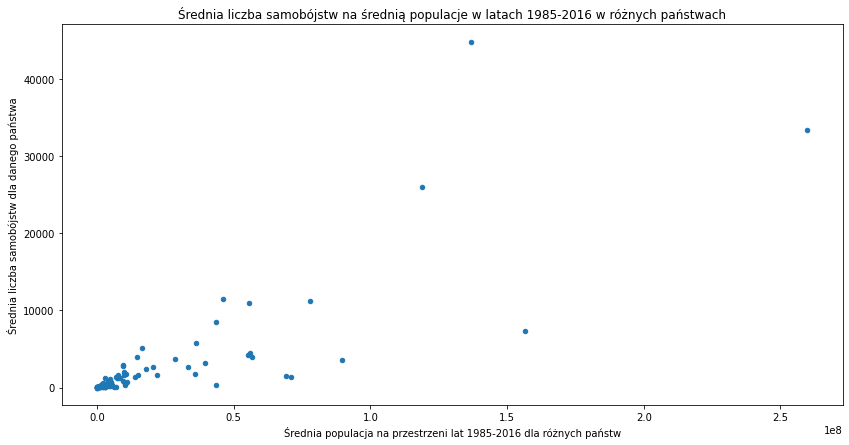

In [18]:
popSuic = dane[["country", "population", "suicides_no", "year"]].groupby(['country', 'year']).agg('sum')
population = popSuic.copy().reset_index()
population = population[["country", "population", "suicides_no"]].groupby(['country']).agg('mean')
#display(population)

population = population.rename(columns = {"suicides_no": "średnia liczba samobójstw"})
population = population.rename(columns = {"population": "średnia populacja"})
population.plot.scatter(x = "średnia populacja", y = "średnia liczba samobójstw", 
                        title = "Średnia liczba samobójstw na średnią populacje w latach 1985-2016 w różnych państwach",figsize=(14,7), 
                        xlabel = "Średnia populacja na przestrzeni lat 1985-2016 dla różnych państw", ylabel="Średnia liczba samobójstw dla danego państwa")

X = population["średnia populacja"].values
Y = population["średnia liczba samobójstw"].values


Model liniowy

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1,1), 
              Y_train)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')


os_x = np.linspace(start=X.min(), stop=X.max())
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))


Parametry modelu liniowego: [0.00014], -98.83903
Błąd średniokwadratowy modelu liniowego: 4.53e+06



Uogólniony model liniowy

In [20]:
from sklearn.preprocessing import PolynomialFeatures


model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), 
              Y_train)
print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))


Parametry modelu GLM: [ 0.      0.0002 -0.    ], -235.21475
Błąd średniokwadratowy modelu GLM: 5.15e+06



Wizualizacja

Text(0.5, 1.0, 'Średnia liczba samobójstw na średnią populacje w latach 1985-2016 w różnych państwach')

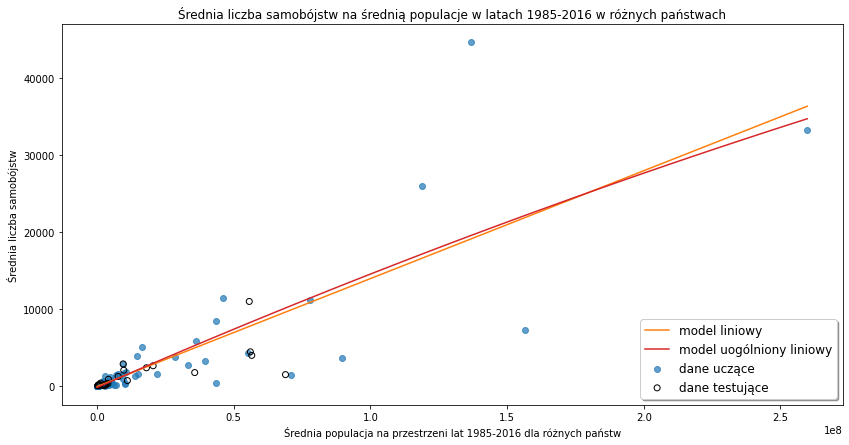

In [21]:
plt.figure(figsize=(14,7))
plt.scatter(X_train, Y_train, label='dane uczące', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model uogólniony liniowy', color='tab:red')
plt.xlabel("Średnia populacja na przestrzeni lat 1985-2016 dla różnych państw")
plt.ylabel("Średnia liczba samobójstw")
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.title("Średnia liczba samobójstw na średnią populacje w latach 1985-2016 w różnych państwach")